# Modul

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [32]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, zoom_out_factor=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
# ----------------------------------------------------------------
    # Menghitung lebar dan tinggi area plot
    x_range = xmax - xmin
    y_range = ymax - ymin

    # Menghitung tengah plot
    x_center = (xmin + xmax) / 2
    y_center = (ymin + ymax) / 2

    # Mengubah skala sumbu x dan y sesuai dengan faktor zoom_out_factor
    new_xmin = x_center - (x_range * zoom_out_factor / 2)
    new_xmax = x_center + (x_range * zoom_out_factor / 2)
    new_ymin = y_center - (y_range * zoom_out_factor / 2)
    new_ymax = y_center + (y_range * zoom_out_factor / 2)
# --------------------------------------------------------------
    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    # plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.xlim(new_xmin - padding, new_xmax + padding)
    plt.ylim(new_ymin - padding, new_ymax + padding)
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [35]:
def hebb_fit(train, target, verbose=False, draw=False,
draw_padding=1):
  w = np.zeros(len(train[0]) + 1)
  bias = np.ones((len(train), 1))
  train = np.hstack((bias, train))
  for r, row in enumerate(train):
    w = [w[i] + row[i] * target[r] for i in range(len(row))]
    if verbose:
      print('Bobot:', w)
    if draw:
      plot(line(w, 0), train, target, draw_padding, zoom_out_factor=3)

  return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [5]:
def hebb_predict(X, w):
  Y = []
  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)
  return Y

### d) Fungsi Hitung Akurasi

In [6]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

# Soal

Gunakan dataset "Healthcare-Diabetes.csv" yang telah dilampirkan

Soal yang diajukan:
1. Gunakan data baris ke 6-10

## Import data

In [7]:
import pandas as pd

data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Preprocess

In [9]:
data = data.drop('Id',axis=1)
data['Outcome'] = data['Outcome'].replace(0,-1)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


## Pengujian

Bobot: [-1.0, -5.0, -116.0, -74.0, 0.0, 0.0, -25.6, -0.201, -30.0]


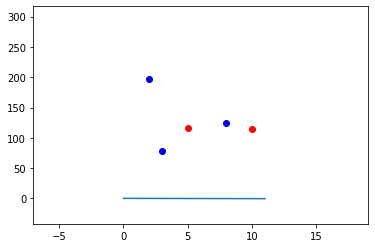

Bobot: [0.0, -2.0, -38.0, -24.0, 32.0, 88.0, 5.399999999999999, 0.046999999999999986, -4.0]


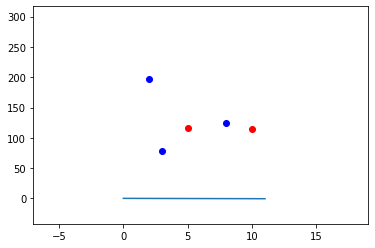

Bobot: [-1.0, -12.0, -153.0, -24.0, 32.0, 88.0, -29.9, -0.08700000000000002, -33.0]


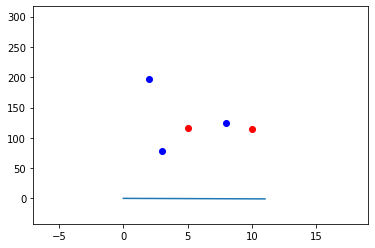

Bobot: [0.0, -10.0, 44.0, 46.0, 77.0, 631.0, 0.6000000000000014, 0.07099999999999998, 20.0]


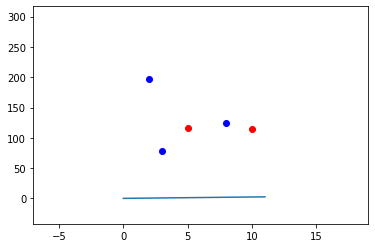

Bobot: [1.0, -2.0, 169.0, 142.0, 77.0, 631.0, 0.6000000000000014, 0.303, 74.0]


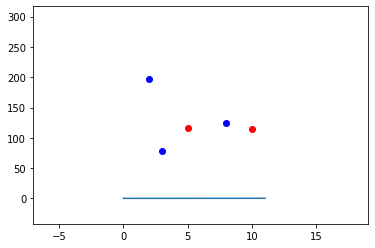

Output: [1, 1, 1, 1, 1]
Target: [-1  1 -1  1  1]
Accuracy: 0.6


In [49]:
#isilah array train oleh praktikan berdasarkan nilai data ke 6 - 10
train = np.array([
    data.iloc[5],
    data.iloc[6],
    data.iloc[7],
    data.iloc[8],
    data.iloc[9]
])
train = data.iloc[5:10].drop('Outcome', axis=1).values

#isilah array target oleh praktikan berdasarkan nilai data ke 6 - 10
target = np.array(data.iloc[5:10]['Outcome'].values)
model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

## Analisis Hasil dan Kesimpulan